In [2]:
%matplotlib inline
import os, glob
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.regularizers import l2, activity_l2
from keras.utils import np_utils
from keras.utils.visualize_util import plot


Using Theano backend.


In [3]:
X = np.load("./data/X_data.npz")
y = np.load("./data/y_data.npz")

In [4]:
X_train = X['X_train']
X_test = X['X_test']
y_train = y['y_train']
y_test = y['y_test']

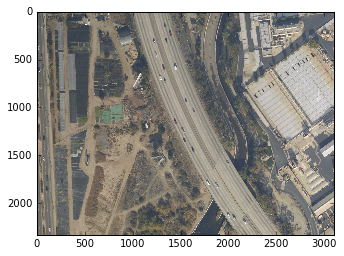

In [14]:
plt.imshow(X_train[10,:,:,:]) # Testing if data is imported correctly

In [5]:
X_train = np.rollaxis(X_train,3,1)
X_test = np.rollaxis(X_test,3,1)

print X_train.shape
print X_test.shape

(200, 3, 2329, 3099)
(150, 3, 2329, 3099)


In [6]:
Y_train_temp = y_train[:,1]-1
Y_test_temp = y_test[:,1]-1

##### Custom training size

In [7]:
batch_size = 2
nb_classes = 5
nb_epoch = 12

# input image dimensions
img_rows = X_train.shape[2]
img_cols = X_train.shape[3]
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 200
# convolution kernel size
nb_conv = 300

RGB = 3

max_features = 5
maxlen = 5  # cut texts after this number of words (among top max_features most common words)


In [8]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train_temp, nb_classes)
Y_test = np_utils.to_categorical(Y_test_temp, nb_classes)

In [9]:
m = 50
n = 50
X_train_custom = X_train[0:m,:,:,:]
X_test_custom = X_test[0:n,:,:,:]
Y_train_custom = Y_train[0:m,:]
Y_test_custom = Y_test[0:n,:]

In [21]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(3, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, border_mode='valid'))
#model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
#model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Reshape((-1,34600000,1)))
model.add(LSTM(128))
#model.add(Dense(16))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

AsTensorError: ('Cannot convert (-1, None, 1, 34600000, 1) to TensorType', <type 'tuple'>)

In [15]:
plot(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Train...')
print(X_train.shape)
print(Y_train.shape)
model.fit(X_train_custom, Y_train_custom, batch_size=batch_size, nb_epoch=15,
          validation_data=(X_test_custom, Y_test_custom))
#score, acc = model.evaluate(X_test_custom, Y_test_custom,
#                            batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
#model.add(LSTM(16, return_sequences=False))  
#model.add(Activation('linear'))
#model.add(GRU(16, input_shape=(batch_size,64),dropout_W=0.2, dropout_U=0.2,return_sequences=True))  # try using a GRU instead, for fun
#model.add(Activation('linear'))
#model.add(LSTM(256, input_shape=(batch_size,64),dropout_W=0.2, dropout_U=0.2,return_sequences=False))  # try using a GRU instead, for fun
#model.add(Dense(5,init='zero'))
#model.add(Activation('sigmoid'))